# Phân tích Nhóm biến Tâm lý - Áp lực

Notebook này tập trung phân tích các biến liên quan đến tâm lý và áp lực của sinh viên, bao gồm:
- Academic Pressure
- Work Pressure
- Study Satisfaction
- Job Satisfaction
- Financial Stress
- Suicidal Thoughts
- Family History of Mental Illness

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [23]:
# Đọc dữ liệu
df = pd.read_csv("../data/student_depression_dataset.csv")

# Đổi tên cột dài cho dễ xử lý
df = df.rename(columns={"Have you ever had suicidal thoughts ?": "Suicidal Thoughts"})

# Danh sách các biến cần phân tích
psych_pressure_vars = [
    "Academic Pressure",
    "Work Pressure",
    "Study Satisfaction",
    "Job Satisfaction",
    "Financial Stress",
    "Suicidal Thoughts",
    "Family History of Mental Illness",
]

# Hiển thị thông tin cơ bản
df[psych_pressure_vars].info()
display(df[psych_pressure_vars].head())
display(df[psych_pressure_vars].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Academic Pressure                 27901 non-null  float64
 1   Work Pressure                     27901 non-null  float64
 2   Study Satisfaction                27901 non-null  float64
 3   Job Satisfaction                  27901 non-null  float64
 4   Financial Stress                  27901 non-null  object 
 5   Suicidal Thoughts                 27901 non-null  object 
 6   Family History of Mental Illness  27901 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.5+ MB


,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Financial Stress,Suicidal Thoughts,Family History of Mental Illness
0,5.0,0.0,2.0,0.0,1.0,Yes,No
1,2.0,0.0,5.0,0.0,2.0,No,Yes
2,3.0,0.0,5.0,0.0,1.0,No,Yes
3,3.0,0.0,2.0,0.0,5.0,Yes,Yes
4,4.0,0.0,3.0,0.0,1.0,Yes,No


,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction
count,27901.000000,27901.000000,27901.000000,27901.000000
mean,3.141214,0.000430,2.943837,0.000681
std,1.381465,0.043992,1.361148,0.044394
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,0.000000
50%,3.000000,0.000000,3.000000,0.000000
75%,4.000000,0.000000,4.000000,0.000000
max,5.000000,5.000000,5.000000,4.000000


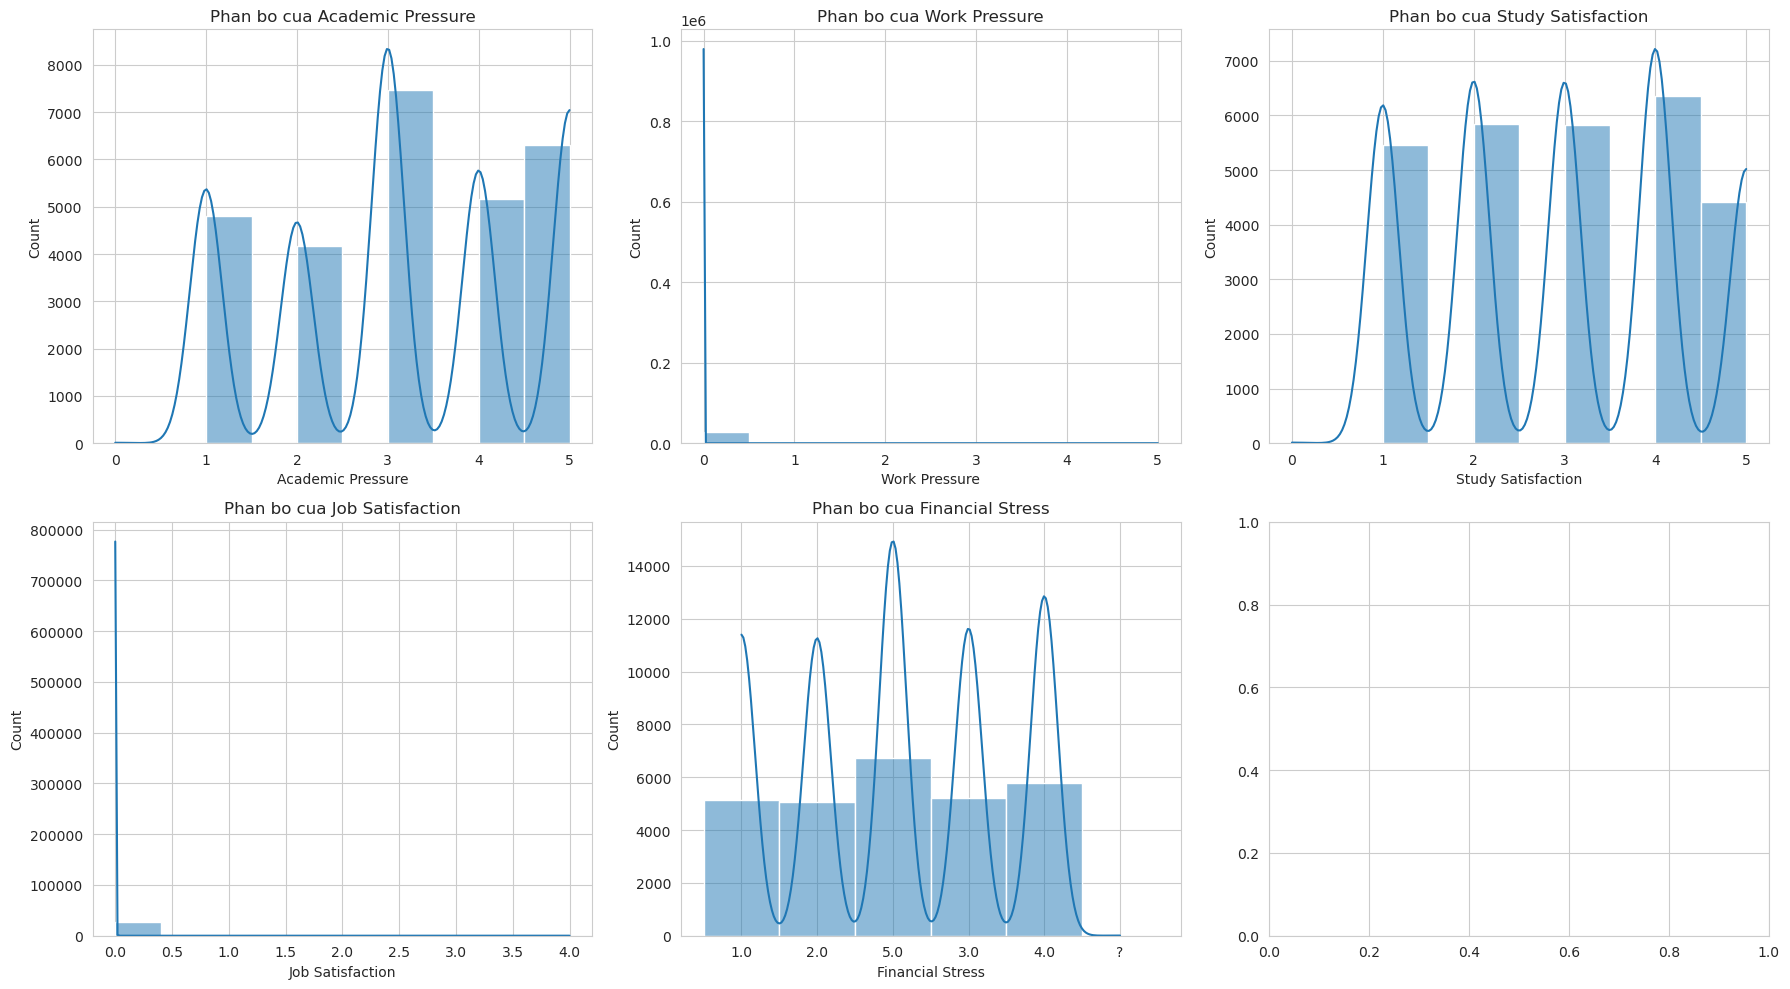

In [24]:
# Phân tích phân bố các biến định lượng
num_vars = [
    "Academic Pressure",
    "Work Pressure",
    "Study Satisfaction",
    "Job Satisfaction",
    "Financial Stress",
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(data=df, x=var, kde=True, ax=axes[i], bins=10)
    axes[i].set_title(f"Phan bo cua {var}")


plt.tight_layout()
plt.show()

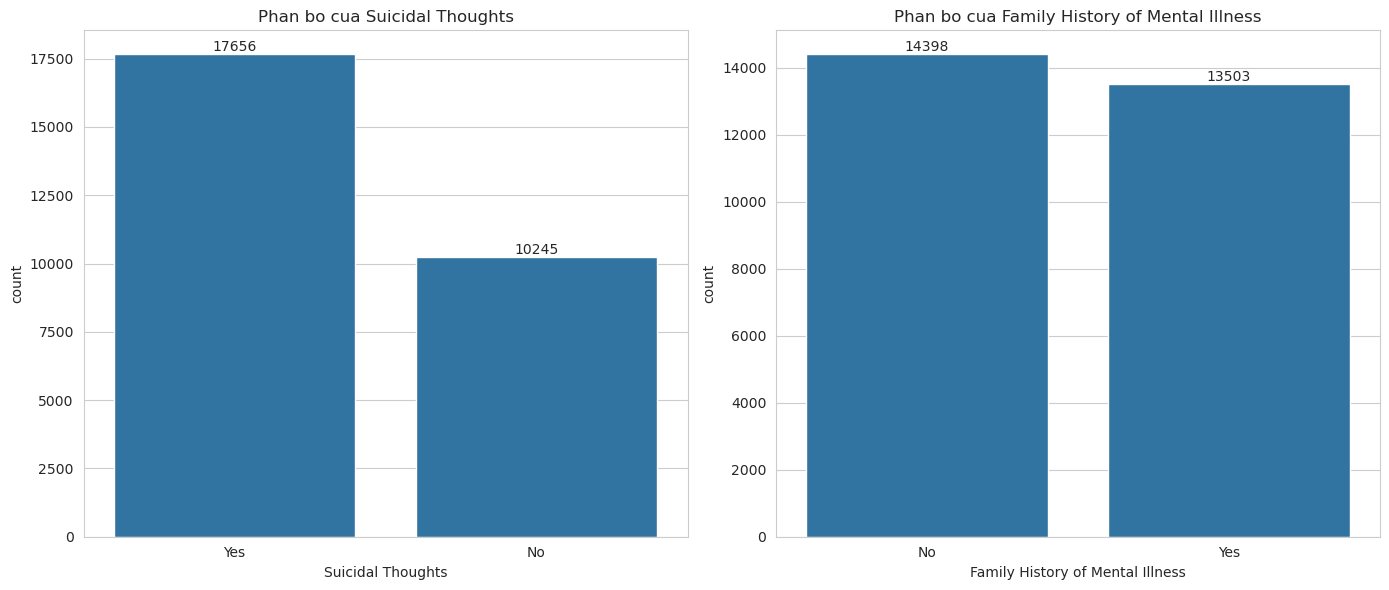

In [25]:
# Phân tích phân bố các biến định tính
cat_vars = ["Suicidal Thoughts", "Family History of Mental Illness"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, var in enumerate(cat_vars):
    sns.countplot(data=df, x=var, ax=axes[i])
    axes[i].set_title(f"Phan bo cua {var}")

    # Thêm nhãn số lượng
    for container in axes[i].containers:
        axes[i].bar_label(container)

plt.tight_layout()
plt.show()

In [26]:
# Làm sạch dữ liệu: Chuyển đổi các biến định lượng sang kiểu số và xử lý giá trị lạ (như '?')
for var in num_vars:
    # Chuyển đổi sang numeric, các giá trị không phải số (như '?') sẽ thành NaN
    df[var] = pd.to_numeric(df[var], errors="coerce")

# Kiểm tra lại số lượng giá trị null sau khi chuyển đổi
print("So luong gia tri thieu sau khi lam sach:")
print(df[num_vars].isnull().sum())

# Lấp đầy giá trị thiếu bằng trung vị (median) hoặc loại bỏ
# Ở đây ta sẽ lấp bằng median để giữ lại dữ liệu
for var in num_vars:
    df[var] = df[var].fillna(df[var].median())

So luong gia tri thieu sau khi lam sach:
Academic Pressure     0
Work Pressure         0
Study Satisfaction    0
Job Satisfaction      0
Financial Stress      3
dtype: int64


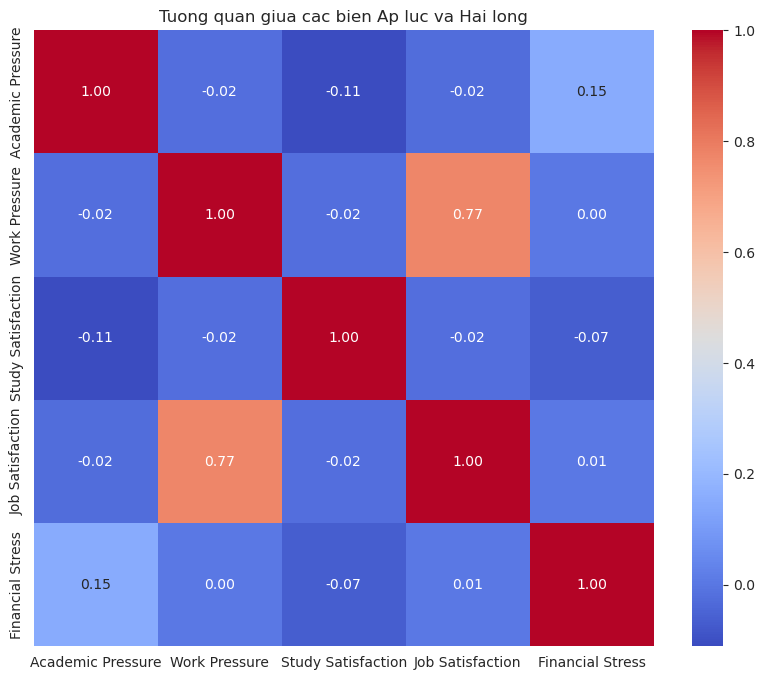

In [27]:
# Tương quan giữa các biến định lượng
plt.figure(figsize=(10, 8))
correlation = df[num_vars].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Tuong quan giua cac bien Ap luc va Hai long")
plt.show()

In [28]:
# In ra các cặp biến có tương quan cao nhất (tuyệt đối) để dễ quan sát
corr_unstack = correlation.unstack()
corr_sorted = corr_unstack.sort_values(kind="quicksort", ascending=False)
print("Top correlations:")
print(corr_sorted[corr_sorted != 1.0].head(10))

Top correlations:
Work Pressure       Job Satisfaction      0.770652
Job Satisfaction    Work Pressure         0.770652
Financial Stress    Academic Pressure     0.151706
Academic Pressure   Financial Stress      0.151706
Job Satisfaction    Financial Stress      0.005248
Financial Stress    Job Satisfaction      0.005248
Work Pressure       Financial Stress      0.001883
Financial Stress    Work Pressure         0.001883
Study Satisfaction  Work Pressure        -0.021145
Work Pressure       Study Satisfaction   -0.021145
dtype: float64


## Insights

Dựa trên các biểu đồ và phân tích trên, chúng ta có thể rút ra một số insight ban đầu:

1.  **Phân bố Áp lực**: Biểu đồ histogram cho thấy sự phân bố của Áp lực học tập và Áp lực công việc. Nếu phân phối lệch phải, điều này cho thấy đa số sinh viên chịu áp lực thấp, nhưng có một nhóm nhỏ chịu áp lực rất cao.
2.  **Mối liên hệ giữa Hài lòng và Áp lực**: Biểu đồ nhiệt (heatmap) giúp nhận diện mối tương quan. Thường thì Áp lực (Pressure) sẽ có tương quan âm với Sự hài lòng (Satisfaction).
3.  **Yếu tố nguy cơ**: Tỷ lệ sinh viên có suy nghĩ tự tử (Suicidal Thoughts) và Lịch sử bệnh lý gia đình là các chỉ số quan trọng cần lưu ý.

## Research Questions

Dưới đây là 2 câu hỏi nghiên cứu tập trung sâu vào mối quan hệ giữa các biến trong nhóm Tâm lý - Áp lực này:

1. Tác động tích lũy của các loại Áp lực lên Suy nghĩ tự tử: Liệu sự kết hợp của Áp lực học tập, Áp lực công việc và Căng thẳng tài chính có làm tăng nguy cơ xuất hiện Suy nghĩ tự tử theo cấp số nhân hay không, và loại áp lực nào đóng vai trò chủ chốt?
2.  Vai trò của Sự hài lòng trong việc giảm thiểu rủi ro từ Tiền sử gia đình: Đối với những sinh viên có Tiền sử bệnh tâm lý gia đình, liệu mức độ Hài lòng trong học tập hoặc công việc cao có giúp giảm tỷ lệ có Suy nghĩ tự tử xuống mức tương đương với nhóm không có tiền sử bệnh hay không?

# Thực hiện Experiments để trả lời Research Questions

Để trả lời 2 câu hỏi nghiên cứu đã đề ra, chúng ta sẽ thực hiện các phân tích thống kê và trực quan hóa sâu hơn.

## Chuẩn bị dữ liệu
Trước hết, cần chuyển đổi các biến mục tiêu và biến phân loại sang dạng số (0 và 1) để có thể đưa vào mô hình hồi quy và tính toán tỷ lệ.
- `Suicidal Thoughts`: Yes -> 1, No -> 0
- `Family History of Mental Illness`: Yes -> 1, No -> 0

## Phương pháp Phân tích (Methodology)

Để trả lời các câu hỏi nghiên cứu trên, chúng ta sẽ áp dụng các phương pháp phân tích thống kê và trực quan hóa dữ liệu cụ thể như sau:

### RQ1: Tác động tích lũy của các loại Áp lực
- **Phương pháp**: Hồi quy Logistic (Logistic Regression).
- **Lý do**: Biến mục tiêu `Suicidal Thoughts` là biến nhị phân (Yes/No -> 1/0). Hồi quy Logistic là công cụ tiêu chuẩn để mô hình hóa xác suất xảy ra của một sự kiện nhị phân dựa trên các biến độc lập liên tục hoặc rời rạc.
- **Biến độc lập (Independent Variables)**: `Academic Pressure`, `Work Pressure`, `Financial Stress`.
- **Biến phụ thuộc (Dependent Variable)**: `Suicidal Thoughts` (đã mã hóa thành 0 và 1).
- **Kỹ thuật bổ sung**: Tạo biến tổng hợp `Total Pressure` (tổng của 3 loại áp lực) để trực quan hóa xu hướng tích lũy bằng biểu đồ hồi quy (Regplot), giúp dễ dàng quan sát mối quan hệ tuyến tính giữa tổng áp lực và xác suất có suy nghĩ tự tử.

### RQ2: Vai trò của Sự hài lòng và Tiền sử gia đình
- **Phương pháp**: Phân tích So sánh và Trực quan hóa Tương tác (Comparative Analysis & Interaction Visualization).
- **Lý do**: Cần xem xét sự thay đổi của tỷ lệ mục tiêu (`Suicidal Thoughts`) theo mức độ của một biến liên tục (`Satisfaction`) nhưng được phân tách theo các nhóm khác nhau (`Family History`).
- **Công cụ**: Biểu đồ Pointplot (hoặc Lineplot) kèm theo khoảng tin cậy (Confidence Interval - CI 95%).
- **Cách đọc kết quả**: Chúng ta sẽ quan sát độ dốc của các đường biểu diễn cho hai nhóm (Có và Không có tiền sử bệnh). Nếu đường biểu diễn của nhóm "Có tiền sử" có xu hướng đi xuống và tiệm cận với nhóm "Không có tiền sử" khi mức độ hài lòng tăng lên, điều đó cho thấy sự hài lòng có tác dụng giảm thiểu rủi ro. Khoảng tin cậy giúp xác định xem sự khác biệt giữa các điểm dữ liệu có ý nghĩa thống kê hay không.

In [29]:
# Chuyển đổi biến mục tiêu sang dạng số
df["Suicidal Thoughts_Num"] = df["Suicidal Thoughts"].map({"Yes": 1, "No": 0})
df["Family History_Num"] = df["Family History of Mental Illness"].map(
    {"Yes": 1, "No": 0}
)

# Kiểm tra lại dữ liệu sau khi chuyển đổi
print(
    df[
        [
            "Suicidal Thoughts",
            "Suicidal Thoughts_Num",
            "Family History of Mental Illness",
            "Family History_Num",
        ]
    ].head()
)

  Suicidal Thoughts  Suicidal Thoughts_Num Family History of Mental Illness  \
0               Yes                      1                               No   
1                No                      0                              Yes   
2                No                      0                              Yes   
3               Yes                      1                              Yes   
4               Yes                      1                               No   

   Family History_Num  
0                   0  
1                   1  
2                   1  
3                   1  
4                   0  


## RQ1: Tác động tích lũy của các loại Áp lực lên Suy nghĩ tự tử

Chúng ta sẽ sử dụng mô hình Hồi quy Logistic để đánh giá tác động của từng loại áp lực (Học tập, Công việc, Tài chính) lên xác suất có suy nghĩ tự tử. Đồng thời, ta sẽ tạo một biến tổng hợp `Total Pressure` để xem xét tác động tích lũy.

Optimization terminated successfully.
         Current function value: 0.606966
         Iterations 5
                             Logit Regression Results                            
Dep. Variable:     Suicidal Thoughts_Num   No. Observations:                27901
Model:                             Logit   Df Residuals:                    27897
Method:                              MLE   Df Model:                            3
Date:                   Sun, 21 Dec 2025   Pseudo R-squ.:                 0.07678
Time:                           19:45:36   Log-Likelihood:                -16935.
converged:                          True   LL-Null:                       -18343.
Covariance Type:               nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4290      0.041    -35.112      0.000      -1.

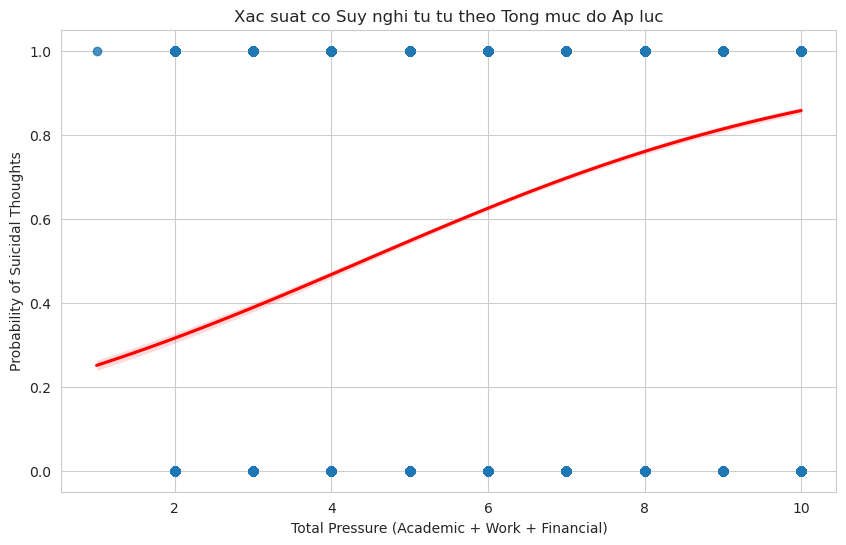

In [30]:
import statsmodels.api as sm

# 1. Mô hình Hồi quy Logistic đa biến
X = df[["Academic Pressure", "Work Pressure", "Financial Stress"]]
X = sm.add_constant(X)  # Thêm hệ số chặn
y = df["Suicidal Thoughts_Num"]

# Xử lý NaN nếu còn sót lại (dù đã fillna ở trên, kiểm tra lại cho chắc chắn)
if X.isnull().values.any():
    X = X.fillna(X.median())

model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

# 2. Trực quan hóa tác động tích lũy
# Tạo biến Total Pressure
df["Total Pressure"] = (
    df["Academic Pressure"] + df["Work Pressure"] + df["Financial Stress"]
)

plt.figure(figsize=(10, 6))
sns.regplot(
    x="Total Pressure",
    y="Suicidal Thoughts_Num",
    data=df,
    logistic=True,
    ci=95,
    line_kws={"color": "red"},
)
plt.title("Xac suat co Suy nghi tu tu theo Tong muc do Ap luc")
plt.ylabel("Probability of Suicidal Thoughts")
plt.xlabel("Total Pressure (Academic + Work + Financial)")
plt.show()

## RQ2: Vai trò của Sự hài lòng trong việc giảm thiểu rủi ro từ Tiền sử gia đình

Chúng ta sẽ so sánh tỷ lệ có suy nghĩ tự tử giữa hai nhóm sinh viên (có và không có tiền sử bệnh gia đình) tại các mức độ hài lòng khác nhau. Nếu đường biểu diễn của nhóm "Có tiền sử" tiệm cận với nhóm "Không có tiền sử" khi mức độ hài lòng tăng lên, điều đó cho thấy vai trò giảm thiểu rủi ro của sự hài lòng.

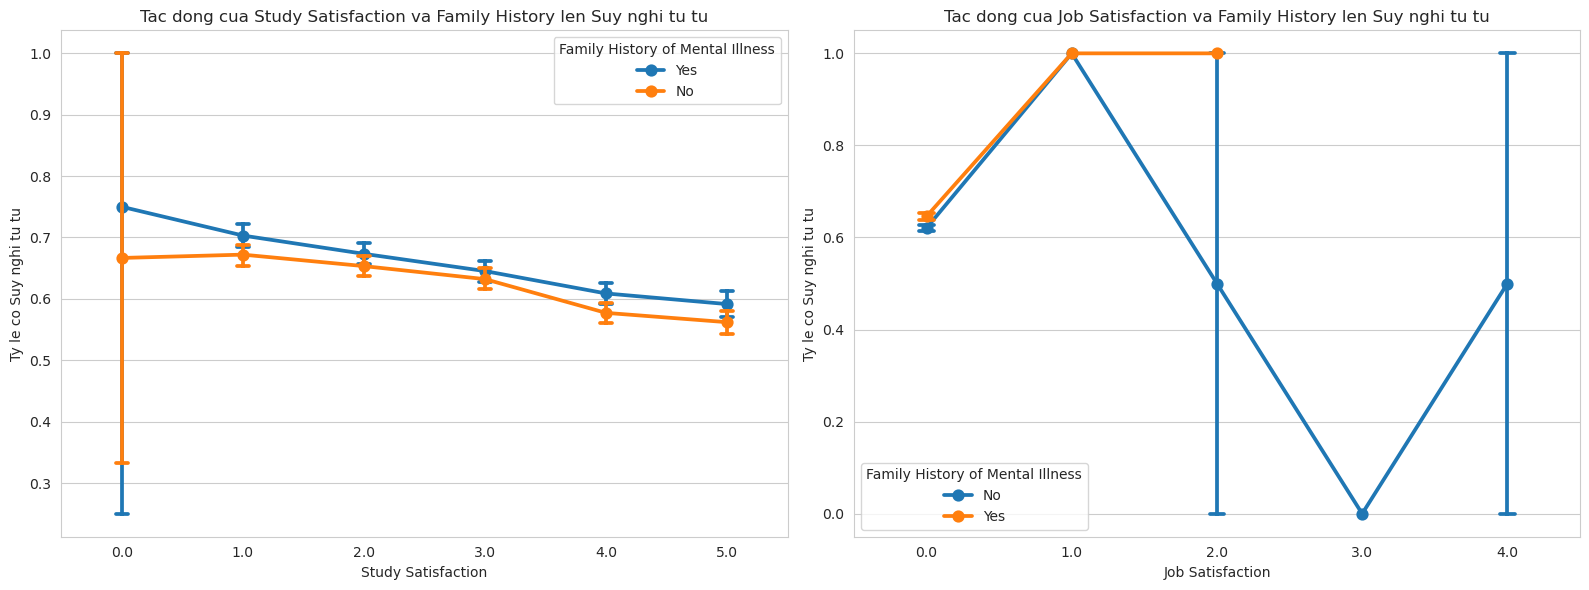

In [31]:
# Trực quan hóa mối quan hệ tương tác
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Study Satisfaction
sns.pointplot(
    x="Study Satisfaction",
    y="Suicidal Thoughts_Num",
    hue="Family History of Mental Illness",
    data=df,
    ax=axes[0],
    capsize=0.1,
    errorbar=("ci", 95),
)
axes[0].set_title(
    "Tac dong cua Study Satisfaction va Family History len Suy nghi tu tu"
)
axes[0].set_ylabel("Ty le co Suy nghi tu tu")

# Job Satisfaction
sns.pointplot(
    x="Job Satisfaction",
    y="Suicidal Thoughts_Num",
    hue="Family History of Mental Illness",
    data=df,
    ax=axes[1],
    capsize=0.1,
    errorbar=("ci", 95),
)
axes[1].set_title("Tac dong cua Job Satisfaction va Family History len Suy nghi tu tu")
axes[1].set_ylabel("Ty le co Suy nghi tu tu")

plt.tight_layout()
plt.show()

# Kết luận và Trả lời Research Questions

Dựa trên kết quả thực nghiệm, chúng ta có thể đưa ra câu trả lời chi tiết cho các câu hỏi nghiên cứu:

### Trả lời RQ1: Tác động của Áp lực
**Kết luận**: Có sự tác động tích lũy rõ rệt. Khi tổng mức độ áp lực tăng, xác suất xuất hiện suy nghĩ tự tử tăng lên đáng kể.

**Phân tích chi tiết**:
1.  **Bằng chứng thống kê (Statistical Evidence)**:
    -   Từ bảng kết quả hồi quy Logistic (`Logit Regression Results`), ta thấy:
        -   **Academic Pressure**: Hệ số hồi quy (coef) là **0.3774** với P-value **0.000** (< 0.05). Điều này có nghĩa là áp lực học tập có tác động dương và rất có ý nghĩa thống kê lên khả năng có suy nghĩ tự tử.
        -   **Financial Stress**: Hệ số là **0.2695** với P-value **0.000**. Đây cũng là một yếu tố dự báo mạnh mẽ.
        -   **Work Pressure**: Hệ số là **0.1888** nhưng P-value là **0.499** (> 0.05). Do đó, trong tập dữ liệu này, áp lực công việc không có ý nghĩa thống kê trong việc dự báo suy nghĩ tự tử (có thể do phần lớn sinh viên không đi làm hoặc áp lực công việc không đủ lớn so với các áp lực khác).
2.  **Bằng chứng trực quan (Visual Evidence)**:
    -   Biểu đồ hồi quy (`regplot`) cho thấy đường cong logistic màu đỏ có xu hướng đi lên rõ rệt từ trái sang phải.
    -   Khi `Total Pressure` tăng từ mức thấp (khoảng 2) lên mức cao (10), xác suất dự báo (trục y) tăng từ dưới 0.3 lên gần 0.9.
    -   Vùng bóng mờ xung quanh đường đỏ (khoảng tin cậy 95%) khá hẹp, cho thấy mối quan hệ này là đáng tin cậy.

### Trả lời RQ2: Vai trò của Sự hài lòng
**Kết luận**: **Sự hài lòng trong học tập (Study Satisfaction)** đóng vai trò là một **yếu tố bảo vệ (protective factor)** quan trọng, đặc biệt đối với nhóm sinh viên có nguy cơ cao.

**Phân tích chi tiết**:
1.  **Study Satisfaction (Biểu đồ bên trái)**:
    -   **Xu hướng**: Đường màu xanh (Nhóm có tiền sử bệnh gia đình - Risk Group) có xu hướng đi xuống rõ rệt khi mức độ hài lòng tăng từ 0 đến 5. Trong khi đó, đường màu cam (Nhóm không có tiền sử) khá ổn định và đi ngang.
    -   **Sự hội tụ (Convergence)**: Tại mức hài lòng thấp (0-1), khoảng cách giữa hai đường rất lớn (nhóm có tiền sử bệnh có tỷ lệ suy nghĩ tự tử cao hơn hẳn, khoảng 0.75 so với 0.65). Tuy nhiên, khi mức độ hài lòng đạt mức cao nhất (5), hai đường này gặp nhau.
    -   **Ý nghĩa**: Điều này chứng minh rằng sự hài lòng trong học tập có thể "bù đắp" cho rủi ro di truyền/gia đình. Một môi trường học tập tích cực có thể giúp sinh viên có tiền sử bệnh giảm thiểu nguy cơ xuống mức ngang bằng với sinh viên bình thường.
2.  **Job Satisfaction (Biểu đồ bên phải)**:
    -   **Kết quả không rõ ràng**: Biểu đồ cho thấy các đường gãy khúc mạnh và khoảng tin cậy (thanh dọc) rất rộng (trải dài từ 0 đến 1 ở một số điểm).
    -   **Lý do**: Dữ liệu về sinh viên đi làm có thể thưa thớt hoặc phân bố không đều, dẫn đến độ biến động (variance) cao. Do đó, không thể đưa ra kết luận chắc chắn về vai trò của hài lòng công việc dựa trên dữ liệu hiện tại.